In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import glob
import pydicom as pdicom

%matplotlib inline


In [2]:
import pandas as pd
import scipy.ndimage
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [3]:
INPUT_FOLDER = '/Users/raopg/Desktop/School/Coursework/CS199/DICOM-Image-Classifier/data'
dicomImgLst = []
def load_dcm(path):
    for dirName, subdirList, fileList in os.walk(path):
        for filename in fileList:
            if '.dcm' in filename.lower():
                dicomImgLst.append(os.path.join(dirName, filename))

In [44]:
load_dcm(INPUT_FOLDER)


In [40]:
# Get a reference file to gauge the dimensions
refDs = pdicom.read_file(dicomImgLst[2000])

ConstPixelDims = (int(refDs.Rows), int(refDs.Columns), len(dicomImgLst))

ConstPixelSpacing = (float(refDs.PixelSpacing[0]), float(refDs.PixelSpacing[1]), float(refDs.SliceThickness))

In [41]:
x = np.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = np.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

In [42]:
ArrayDicom = np.zeros(ConstPixelDims, dtype=refDs.pixel_array.dtype)

for filenameDCM in dicomImgLst:
    ds = pdicom.read_file(filenameDCM)
    
    ArrayDicom[:, :, dicomImgLst.index(filenameDCM)] = ds.pixel_array

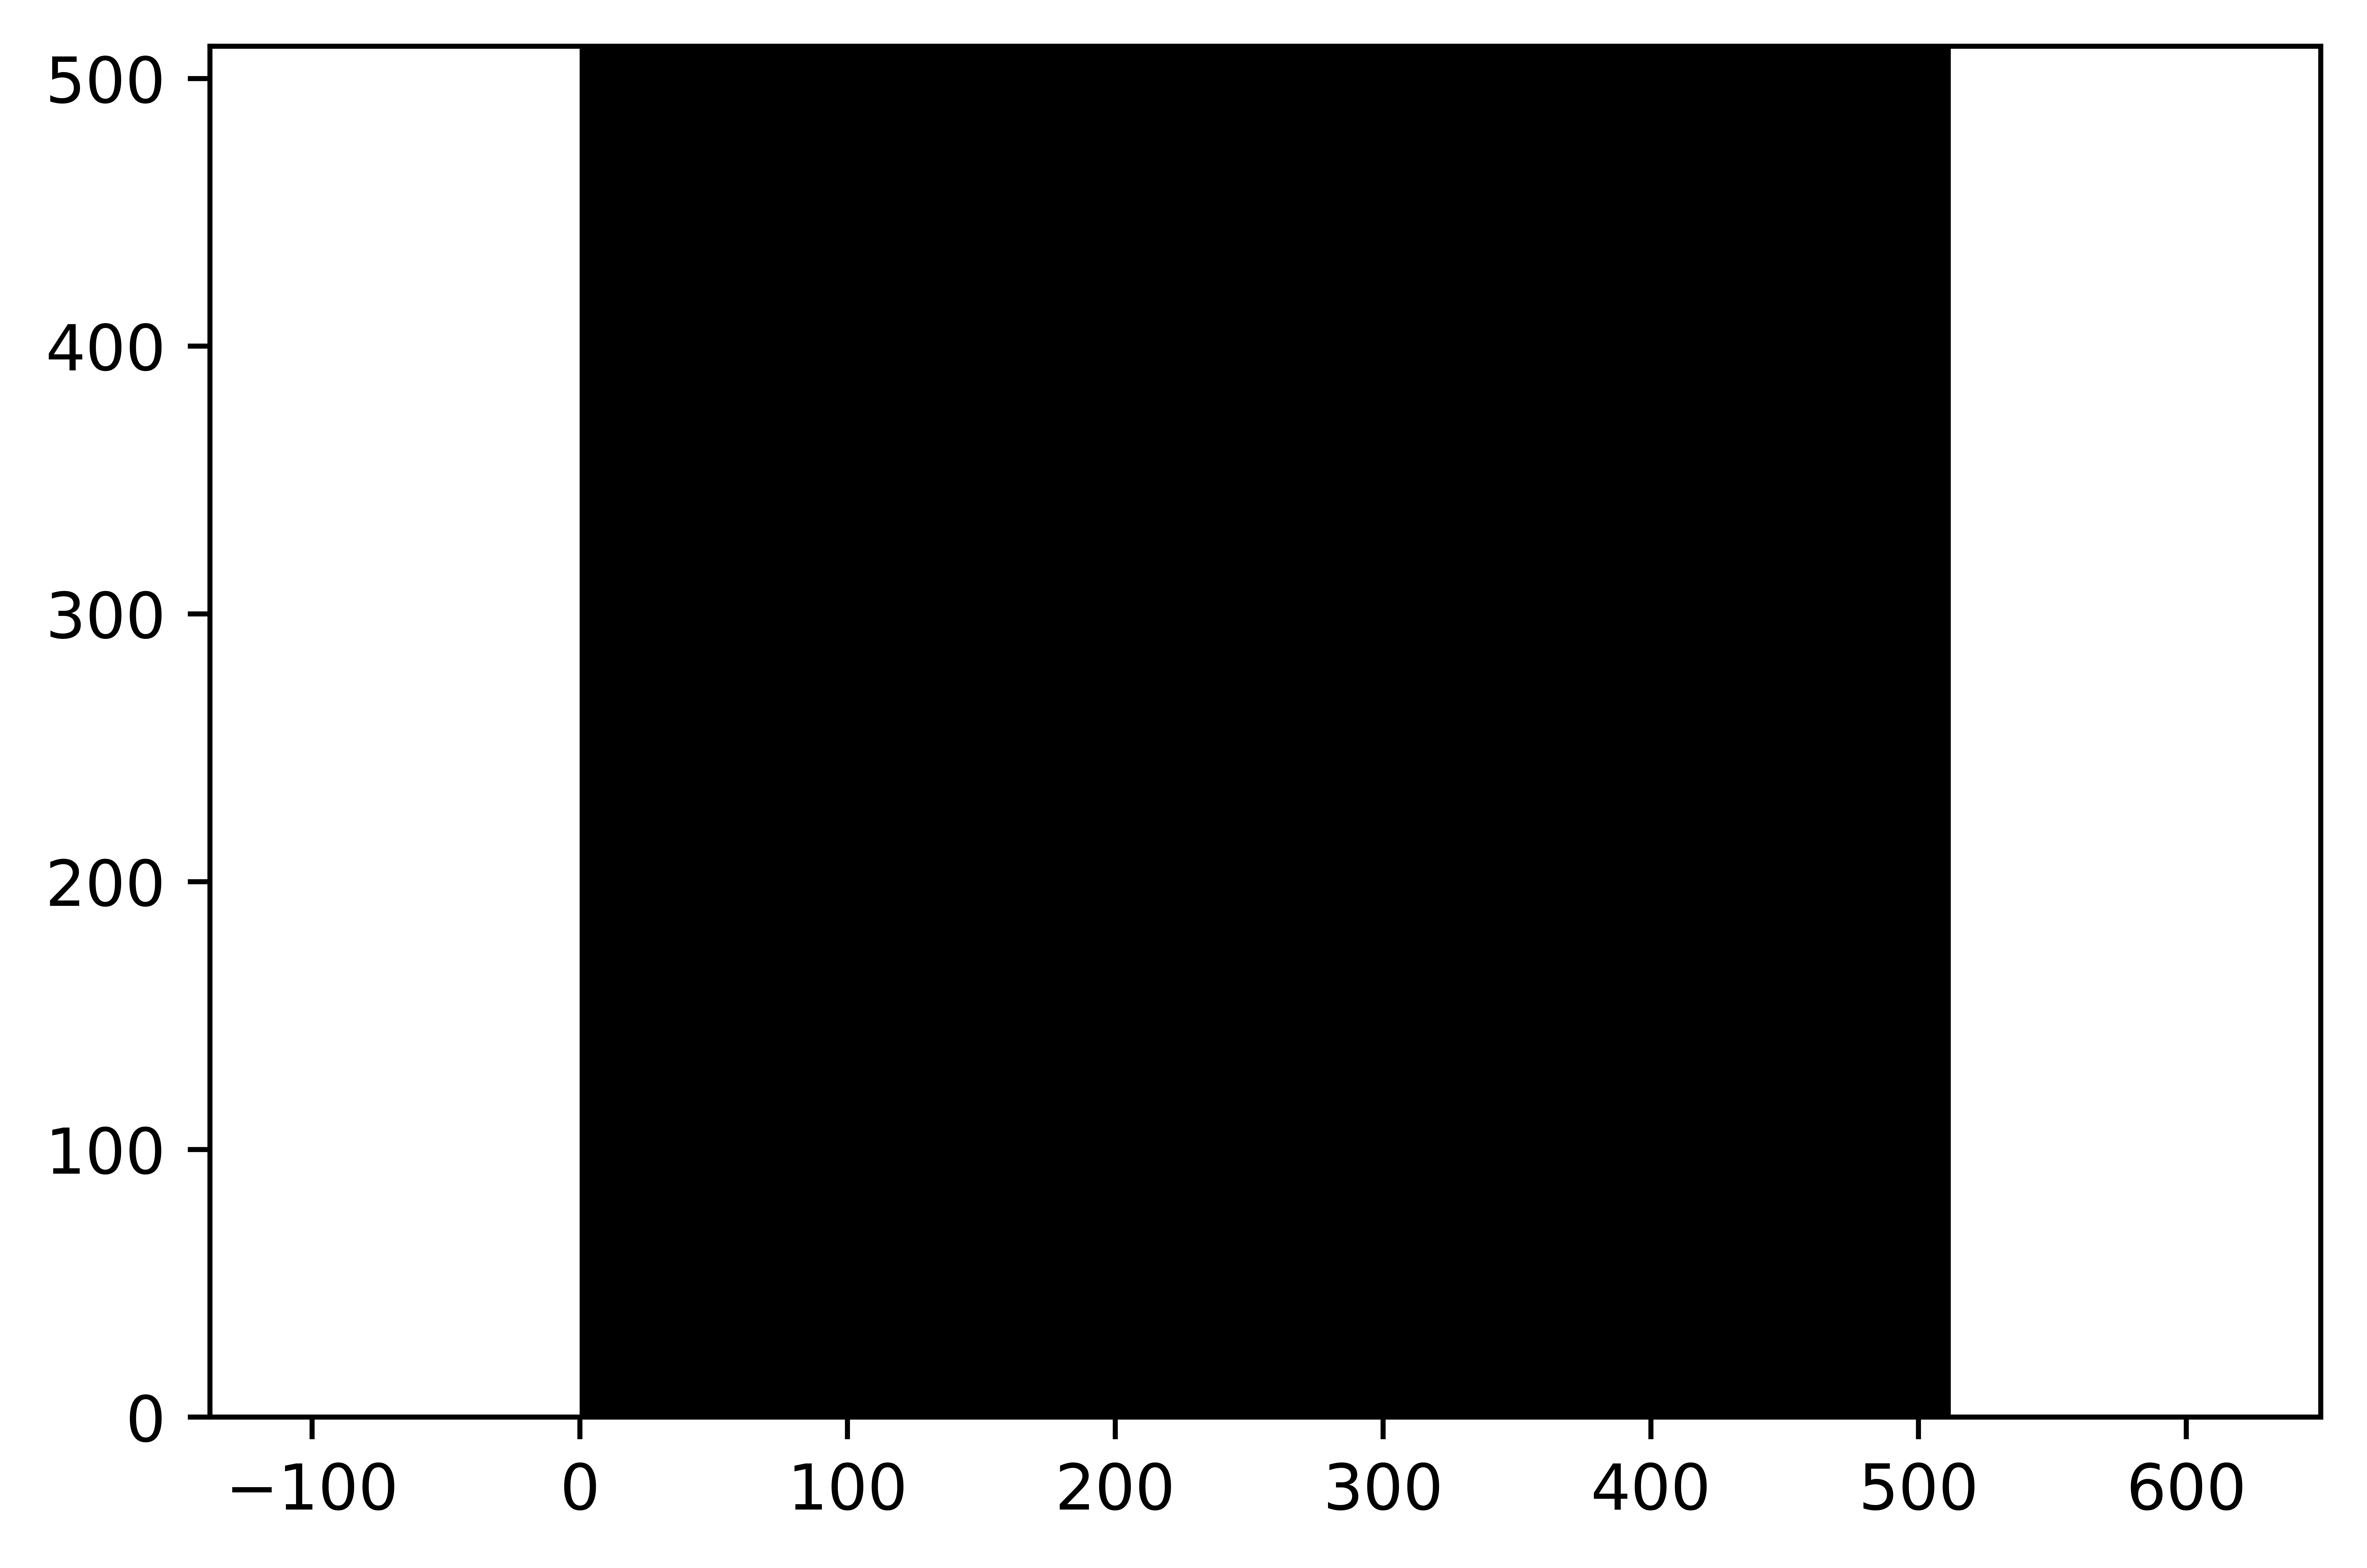

In [43]:
plt.figure(dpi=1600)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
#print(ArrayDicom)
plt.pcolormesh(x,y, np.flipud(ArrayDicom[:,:, 2000]))